PlayTennis Outlook Temperature Humidity    Wind
0        Yes    Rain        Cool   Normal    Weak
1         No    Rain        Mild     High  Strong

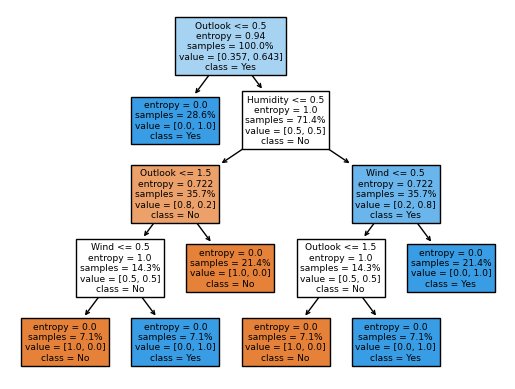

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# Train set
train_data = pd.read_csv('playtennis.csv')
train_features = train_data.drop('PlayTennis', axis=1)
train_labels = train_data['PlayTennis']

# Convert categorical features to numerical values
label_encoders = {}
for column in train_features.columns:
    label_encoders[column] = LabelEncoder()
    train_features[column] = label_encoders[column].fit_transform(train_features[column])

# Convert categorical target variable to numerical values
label_encoder_target = LabelEncoder()
train_labels = label_encoder_target.fit_transform(train_labels)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_features, train_labels)

# Test set
test_data = pd.read_csv('playtennis_test.csv')
test_features = test_data.drop('PlayTennis', axis=1)

# Convert categorical features to numerical values using the same label encoders from training
for column in test_features.columns:
    test_features[column] = label_encoders[column].transform(test_features[column])

# Optional: Visualize or plot the decision tree
plot_tree(clf,
          feature_names=train_features.columns,
          class_names=label_encoder_target.classes_,
          filled=True, # Adds color according to class
          proportion=True);

# Classify the new samples in the test set
predictions = clf.predict(test_features)

# Convert numerical predictions back to categorical values
predicted_labels = label_encoder_target.inverse_transform(predictions)

# Create a DataFrame to display the test set with predicted values
test_with_predictions = test_data.copy()
test_with_predictions['PlayTennis'] = predicted_labels

test_with_predictions